# Clase Tutorial 6: Decision Trees 🌳

## 1. Introducción

Los algoritmos de Árboles de Decisión pertenecen al tipo de algoritmos de aprendizaje supervisado, y si bien pueden ser utilizados para regresiones, son principalmente utilizados en problemas de clasificación.  
  
Existen varios tipos de árboles de decisión:

- Árboles de decisión simples:  
    - **Árboles de clasificación:** realizan predicciones sobre una variable **categórica**. 
    - **Árboles de regresión:** realizan predicciones sobre una variable **contínua**.
    
    
- Árboles de decisión basados en técnicas de Ensamble:
    - **Bagging**. 
    - **Random Forest**.  
    - **Boosting**.  
        - **Gradient Boosting**.
        - **ADA Boost**.  
        - **XG Boost**.  

### Árboles de Decisión Simples

A este tipo de árboles simples se lo suele llamar **CART** (**C**lassification and **R**egression **T**rees) o bien **ACR** (**Á**rboles de **C**lasificación y **R**egresión).
  
A continuación veremos un ejemplo simple de la utilización de árboles de decisión para definir a partir del peso y la altura si una persona adulta es de sexo masculino o femenino.

<img style="float: center;" src="img/Ejemplo_CART.png">

Como podemos observar, un árbol de decisión no es más que un conjunto de reglas:
* `If Altura > 180 cm Then Hombre`
* `If Altura <= 180 cm AND Peso > 80 kg Then Hombre`
* `If Altura <= 180 cm AND Peso <= 80 kg Then Mujer`

Por supuesto existen mujeres que miden más de 1,80m o mujeres que pesen más de 80 kg, pero es importante recordar que los modelos predictivos no buscan ser infalibles sino que buscan poder predecir o clasificar con un determinado grado de precisión que sea aceptable para el uso que se le quiere dar.

La tarea de los algoritmos de CART es justamente definir a partir de los datos de entrada cuál atributo es conveniente utilizar en cada nodo del árbol, y cuál es el punto de corte óptimo en dicho nodo para realizar las particiones de forma tal de lograr obtener el árbol de clasificación con la mayor precisión posible.


### Ventajas y Desventajas de los Árboles de Decisión

#### 👍 Ventajas
- Son fáciles de interpretar, y pueden ser representados gráficamente.
- Pueden capturar patrones no lineales.
- Pueden manejar datos numéricos y categóricos. Pueden manejar variables categóricas sin necesidad de implementar one hot encoding.
- Requieren menos preparación de los datos. No es necesario normalizar el dataset (entrenamiento no está basado en GD y hay pocos parámetros a optimizar).

#### 👎 Desventajas
- No son robustos ya que son muy sensibles a los cambios en el dataset. Un pequeño cambio del dataset, puede generar un árbol completamente distinto.
- Tienen tendencia a sobreajuste (overfitting).
- La precisión suele disminuir para variables continuas.
- Existen otros modelos que presentan mayor precisión.
- Los árboles de decisión suelen verse muy afectados por datasets que no estén balanceados.
- El óptimo global no está garantizado: dado que en cada paso se busca maximizar la ganancia de información, esta metodología no necesariamente puede garantizar el resultado óptimo global.

## 2. Marco Teórico

Un árbol de decisión tiene la siguiente apariencia:

<img style="float: center;" src="img/Arboles-de-decision-001.png">  

  
Un árbol de decisión es una estructura similar a un diagrama de flujo, es por eso que los árboles de decisión son fáciles de entender e interpretar. Los árboles están compuestos por las siguientes partes:
- Cada **Nodo de decisión** representa una característica (o atributo), 
- Cada **Rama** representa una regla de decisión. 
- Cada **nodo Hoja** representa el resultado.
- Al nodo superior en un árbol de decisión se lo conoce como el **nodo raíz**.
- Al nodo del cual se desprenden otros nodos se lo llama **nodo padre** y a los nodos que se desprenden del nodo padre se los llama **nodos hijo**
- Cada rama que no sea un nodo hoja se la puede considerar como un **sub-árbol**.

### 🤔 ¿Cómo funcionan los algoritmos de árboles de decisión?
La idea básica detrás de cualquier algoritmo de árbol de decisión es ir particionando la población inicial en poblaciones más chicas que no se solapen y que sean más homogéneas que la población inicial a fin de que aumenten las posibilidades de predecir la variable objetivo.

Los algoritmos CART realizan ésto, mediante los siguientes pasos: 

1. **Seleccionar la mejor Partición**: de todos los features, seleccionar cuál es aquél que divide la población en segmentos más pequeños y homogéneos (o puros) posibles. 
2. **Particionar**: Crear un nodo de decisión con ese atributo y dividir la población generando nuevos nodos hijos. 
3. Repetir el proceso para cada nodo hijo de manera recursiva hasta que ocurra cualquiera de las siguientes condiciones:
    * Todos los nodos hijos sean puros
    * No queden más atributos para particionar (si el nodo hoja no es puro, para predecir se utiliza la moda del nodo en el caso de variables categóricas y la media en el caso de variables numéricas)  
    * Se aplique un método de corte preestablecido (por ejemplo indicando la profundidad máxima del árbol)

Utilizando el ejemplo anterior del árbol de decisión que clasifica si una persona adulta es mujer u hombre, vamos a ver con un dataset ficticio cómo son los pasos del algoritmo CART para seleccionar con qué features comenzar a particionar la población en cada nodo de manera que estas particiones sean lo más puras posible. Veremos también que el algoritmo se dice que es voraz o avaro ("greedy") en el sentido que en cada paso que da busca obtener la mejor partición posible en ese nodo, sin ser estas particiones necesariamente la mejores cuando uno mira el árbol en todo su conjunto.

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from IPython.display import Image

In [3]:
df=pd.read_csv("Data/ejemploCART.csv")
display(df.head())
print()
pd.DataFrame(df.dtypes,columns=['dtypes'])

,Pelo corto,Peso,Estatura,Sexo
0,False,78,181,M
1,True,82,182,M
2,False,75,162,M
3,False,65,167,M
4,False,85,182,H


,dtypes
Pelo corto,bool
Peso,int64
Estatura,int64
Sexo,object


In [4]:
# Trasformamos columnas continuas (Peso y Estatura) a variables categoricas.
df["Peso"]=df["Peso"].apply(lambda x: x>80)
df["Estatura"]=df["Estatura"].apply(lambda x: x>180)
df['Sexo']= df.Sexo.astype('category') # Convertimos a categorical
display(df.head(3))
print()
pd.DataFrame(df.dtypes,columns=['dtypes'])

,Pelo corto,Peso,Estatura,Sexo
0,False,False,True,M
1,True,True,True,M
2,False,False,False,M


,dtypes
Pelo corto,bool
Peso,bool
Estatura,bool
Sexo,category


In [5]:
df.groupby(['Sexo']).count()

,Pelo corto,Peso,Estatura
Sexo,,,
H,10,10,10
M,10,10,10


Vemos entonces que antes de hacer ninguna partición tenemos que la población total es de 20 personas, siendo:
* 10 mujeres
* 10 hombres  

Por lo que si tratamos de predecir el sexo de una persona, tenemos un 50% de probabilidad de éxito.

A continuación vamos a ver qué variable independiente (Pelo corto, Peso o Estatura) es la que logra particionar la población de una manera más homogenea, de manera que mejore nuestras probabilidades de predecir el sexo de la persona. 

**1. Paricionamos la población por el atributo de "Peso"**

In [6]:
df_peso = df.groupby(['Peso','Sexo'])[['Sexo']].count()
df_peso = df_peso.rename(columns = {'Sexo':'Count'})
df_peso.loc[False,'p']= df_peso.loc[False,'Count'].values / df_peso.loc[False,'Count'].sum()
df_peso.loc[True,'p']= df_peso.loc[True,'Count'].values / df_peso.loc[True,'Count'].sum()
display(df_peso)

Count         p
Peso  Sexo                 
False H         6  0.428571
      M         8  0.571429
True  H         4  0.666667
      M         2  0.333333

**2. Particionamos la población por el atributo de "Estatura"**

In [7]:
df_estatura = df.groupby(['Estatura','Sexo'])[['Sexo']].count()
df_estatura = df_estatura.rename(columns = {'Sexo':'Count'})
df_estatura.loc[False,'p']= df_estatura.loc[False,'Count'].values / df_estatura.loc[False,'Count'].sum()
df_estatura.loc[True,'p']= df_estatura.loc[True,'Count'].values / df_estatura.loc[True,'Count'].sum()
display(df_estatura)

Count         p
Estatura Sexo                 
False    H         4  0.333333
         M         8  0.666667
True     H         6  0.750000
         M         2  0.250000

**3. Particionamos la población por el atributo de "Pelo Corto"**

In [8]:
df_pc = df.groupby(['Pelo corto','Sexo'])[['Sexo']].count()
df_pc = df_pc.rename(columns = {'Sexo':'Count'})
df_pc.loc[False,'p']= df_pc.loc[False,'Count'].values / df_pc.loc[False,'Count'].sum()
df_pc.loc[True,'p']= df_pc.loc[True,'Count'].values / df_pc.loc[True,'Count'].sum()
display(df_pc)

Count    p
Pelo corto Sexo            
False      H         2  0.2
           M         8  0.8
True       H         8  0.8
           M         2  0.2

Luego de hacer el split utilizando todas las variables independientes, podemos comparar cuál es la que me permite predecir mejor si la persona es hombre o mujer:

<img style="float: center;" src="img/Split_Peso.png"> <img style="float: center;" src="img/Split_estatura.png"> <img style="float: center;" src="img/Split_PC.png">

1. Peso: los nodos hijos son casi tan heterogéneos como la población total. Es decir esta partición no está aumentando de forma considerable las probabilidades de mejorar la predicción.

2. Estatura: logra cierto grado de homogeneidad en los nodos hijos, con lo cual estamos en mejores condiciones de predecir el sexo de una persona luego de haber contestado a la pregunta si la persona mide más de 180 cm comparado a cómo estaba inicialmente antes de contestar dicha pregunta. 

3. Pelo Corto: igual al segundo, pero logrando incluso mayor homogeneidad en los nodos hijos. Probabilidad aumenta de 50% por adivinar el sexo a 80% por contestar la pregunta si tiene pelo corto.

Observamos entonces que particionando a la población según los distintos atributos, puede aumentar la precisión en la clasificación. Vemos también que dicha precisión va a depender del atributo que selecionemos para realizar la partición, siendo el mejor atributo para particionar aquel que logra que los nodos hijos sean lo más homogéneos (puros) posibles.  

Por lo tanto, como se mencionó anteriormente, la tarea de los algoritmos de árboles de decisión es generar un árbol de decisión que permita predecir la variable dependiente de la siguiente manera:
1. Determinando cuál es el atributo que mejor particiona la población 
2. Realizando la partición con dicho atributo
3. Repitiendo el proceso recursivamente para cada nodo hijo

Veremos a continuación cómo el algoritmo decide cuál es el mejor atributo para particionar en cada nodo.

### 🤔 ¿Cómo seleccionar la mejor partición?
Buscamos que las particiones (splits) generen nodos hijos con la menor impureza posible (o dicho de otra forma, la mayor pureza posible). Existen distintos métodos para evaluar la efectividad de las particiones:
- Índice de Gini
- Test Chi-cuadrado
- Entropía / Ganancia de información 
- Reducción de Varianza

La selección de criterios de decisión dependerá de si los árboles son de clasificación o regresión

| |Regresión  | Clasificación  | 
|:--|:--|:--|
|Variable dependiente|**Continua**|**Categórica**|  
|Criterio de Partición| **Reducción de Varianza**|**Inpureza de Gini** (solo particiones binarias)<br>**Chi-Cuadrado** para particiones de orden mayor a 2<br>**Entropía**|
| Valores de los nodos terminales |la **media** de las observaciones en esa región | la **moda** de las observaciones del conjunto de entrenamiento que han “caído” en esa región| 

### Criterio de partición de Gini
El índice de Gini se utiliza en algoritmos de árboles de Decisión de **clasificación**.

Sólo funciona con variables objetivo (o variables dependientes) categóricas, y si bien solamente permite particiones binarias, puede ser utilizado en problemas de clasificación multi-clase. 

El índice de Gini se mide para cada nodo de decisión como la probabilidad $P(j|t)$, que es la probabilidad de pertenecer a la clase "$j$" estando en el nodo "$t$". En otras palabras, mide la pureza del nodo.

$$
\begin{aligned}
Gini(t) = \sum_{j=1}^{n} [p(j|t))]^{2} = (p_{1}^{2}+p_{2}^{2}+...+p_{n}^{2})
\end{aligned}
$$

Por otro lado, la impureza de Gini la medimos de la siguiente manera:

$$
\begin{aligned}
Impureza\,de\,Gini(t) = 1 - Gini(t)
\end{aligned}
$$

Habiendo calculado la impureza de Gini para cada nodo hijo, podemos calcular el valor total de la impureza de Gini del nodo padre como el promedio ponderado de las impurezas de Gini para cada nodo hijo.

$$
\begin{aligned}
Impureza\,de\,Gini_{split} = \frac{1}{n}\sum_{i=1}^{k}n_{i}\cdot impureza\,de\,Gini(i)
\end{aligned}
$$

Siendo $n_{i}$ la población de cada nodo hijo, y $n$ la población de la sumatoria de los nodos hijos.  

Después de calcular el valor total de la impureza de Gini para el nodo padre para cada uno de los atributos, elegimos aquel atributo que tenga el valor de impureza de Gini más bajo (es decir, el que consigue que los nodos hijos sean lo más puros posibles). Ésto se repite recursivamente por cada nodo hijo.

Hacemos los cálculos para determinar la impureza de Gini para cada partición posible.

In [9]:
print("""
----------------
atributo: PESO
----------------

""")
# definimos una nueva columna que tenga la probabilidad al cuadrado.
df_peso['p2'] = df_peso['p']**2

# siguiendo la formula de Gini, calculamos la impureza de Gini para cada nodo hijo 
imp_gini_false = 1 - df_peso.loc[False,'p2'].sum()
imp_gini_true  = 1 - df_peso.loc[True,'p2'].sum()

# creamos un dataframe con los valores de las impurezas de Gini recién calculadas para cada nodo hijo.
df_gini = pd.DataFrame(index = [False,True],columns=['Impureza Gini'], data=[imp_gini_false,imp_gini_true])
display(df_gini)

# finalmente calculamos el Gini de la partición utilizando el atributo PESO, 
# como el promedio ponderado de las impurezas de Gini de los nodos hijos
Gini_split = 1/20 * ((6+8)*imp_gini_false + (4+2)*imp_gini_true)


print("\nGini split: ",Gini_split)
print()


----------------
atributo: PESO
----------------




,Impureza Gini
False,0.489796
True,0.444444



Gini split:  0.4761904761904763



In [10]:
print("""
--------------------
atributo: ESTATURA
--------------------

""")
# definimos una nueva columna que tenga la probabilidad al cuadrado.
df_estatura['p2'] = df_estatura['p']**2

# siguiendo la formula de Gini, calculamos la impureza de Gini para cada nodo hijo 
imp_gini_false = 1 - df_estatura.loc[False,'p2'].sum()
imp_gini_true  = 1 - df_estatura.loc[True,'p2'].sum()

# creamos un dataframe con los valores de las impurezas de Gini recién calculadas para cada nodo hijo.
df_gini = pd.DataFrame(index = [False,True],columns=['Impureza Gini'], data=[imp_gini_false,imp_gini_true])
display(df_gini)

# finalmente calculamos el Gini de la partición utilizando el atributo ESTATURA, 
# como el promedio ponderado de las impurezas de Gini de los nodos hijos
Gini_split = 1/20 * ((6+8)*imp_gini_false + (4+2)*imp_gini_true)

print("\nGini split: ",Gini_split)
print()


--------------------
atributo: ESTATURA
--------------------




,Impureza Gini
False,0.444444
True,0.375000



Gini split:  0.4236111111111111



In [11]:
print("""
----------------------
atributo: PELO CORTO
----------------------

""")
# definimos una nueva columna que tenga la probabilidad al cuadrado.
df_pc['p2'] = df_pc['p']**2

# siguiendo la formula de Gini, calculamos la impureza de Gini para cada nodo hijo 
imp_gini_false = 1 - df_pc.loc[False,'p2'].sum()
imp_gini_true  = 1 - df_pc.loc[True,'p2'].sum()

# creamos un dataframe con los valores de las impurezas de Gini recién calculadas para cada nodo hijo.
df_gini = pd.DataFrame(index = [False,True],columns=['Impureza Gini'], data=[imp_gini_false,imp_gini_true])
display(df_gini)

# finalmente calculamos el Gini de la partición utilizando el atributo PELO CORTO, 
# como el promedio ponderado de las impurezas de Gini de los nodos hijos
Gini_split = 1/20 * ((6+8)*imp_gini_false + (4+2)*imp_gini_true)

print("\nGini split: ",Gini_split)
print()


----------------------
atributo: PELO CORTO
----------------------




,Impureza Gini
False,0.32
True,0.32



Gini split:  0.31999999999999984



|  | Impureza de Gini |
|--------------------|:----------------:|
| Peso > 80 kg: | 0,48 |
| Estatura > 180 cm: | 0,42 |
| Pelo Corto: | 0,32 |
  
El atributo que genera la mejor partición es **Pelo Corto**. LLegamos a la misma conclusión a la que habíamos arribado anteriormente en forma intuitiva. 

### Ganancia de Información
La ganancia de Información al igual que Gini es utilizada para modelos de clasificación. En este método se busca medir la ganancia de información que se obtiene luego de realizar una pregunta y para ésto utiliza una medición de Entropía. Como ya vimos, no es lo mismo realizar una pregunta basado en un atributo que basado en otro ya que dependiendo del atributo que seleccionamos para hacer la partición, tendremos mayor o menor ganancia de información. Para poder profundizar en este concepto, primero repasaremos sobre el concepto de Entropía.

#### Entropía
En teoría de la información se define Entropía como una forma de medir el grado de desorganización en un sistema. Es decir la Entropía busca medir qué tan parecidos o qué tan diferentes son los elementos de un sistema:
- utilizando el valor mínimo de 0 para conjunto de elementos que son totalmente iguales, 
- utilizando el valor máximo de 1 para los conjuntos que poseen el mayor grado de desorden posible, 
- utilizando los valores entre 0 y 1 para aquellos sistemas que presenten un grado de desorden que esté entre los extremos recien mencionados.

<img style="float: center;" src="img/entropia2.png">

Matemáticamente ésto se representa con la siguiente fórmula:

$$
\begin{aligned}
Entropia = -p{_{1}}log{_{2}}(p{_{1}}) -p{_{2}}log{_{2}}(p{_{2}}) - ... -p{_{n}}log{_{2}}(p{_{n}}) = -\sum p{_{n}}log{_{2}}(p{_{n}})
\end{aligned}
$$

donde:  $p_{i}$ es la proporción de elementos de la $clase_{i}$ en el nodo.

Por otro lado, definimos a la Ganancia de Información como:

$$
\begin{aligned}
Ganancia\ de\ Informacion = Entropia{_{nodo\ padre}} - Suma\ ponderada\ Entropia{_{nodos\ hijos}}
\end{aligned}
$$

Con el marco teórico anterior, podemos entonces volver a analizar nuestro caso ejemplo.

<img style="float: center;" src="img/peso_h.png">
<img style="float: center;" src="img/peso_h_t.png">
<img style="float: center;" src="img/estatura_h.png">
<img style="float: center;" src="img/estatura_h_t.png">
<img style="float: center;" src="img/pelo_h.png">
<img style="float: center;" src="img/pelo_h_t.png">

El atributo que genera la mejor partición es **Pelo Corto**. LLegamos a la misma conclusión a la que habíamos arribado anteriormente con Gini y en forma intuitiva. 

## 3. Optimizando Performance de los Árboles de Decisión
### ✂️ Poda de árboles o Tree Pruning
Como mencionamos anteriormente, los algoritmos de árboles de decisión tienen una fuerte tendencia al sobreajuste. A fin de minimizar el sobreajuste y también reducir la complejidad de los árboles de decisión se suele aplicar la técnica de "poda". Esta técnica básicamente consiste en reducir el tamaño del árbol, ya sea mediante cualquiera de las siguientes **criterios de corte**:
- Limitando la profundidad máxima del árbol (`max_depth`)
- Limitando el número mínimo de muestras requeridas en cada hoja (`min_samples_leaf`)
- Limitando el número mínimo de muestras necesarias para particionar (`min_samples_split`)

## 4. Implementación de un Árbol de Decisión

- Vamos a crear una clase `DecisionTree`. 
- Para esta implementación, usaremos la Entropía como criterio de división. La función `find_best_split` se basará en buscar las divisiones con menor entropía. Tendremos un approach "greedy" para simplificar el código.
- También, creamos la clase `TreeNode` donde guardamos la información de los splits y la relación con los nodos de la derecha e izquierda.
- Finalmente, la función `create_tree` es una función recursiva que crea el árbol y eventualmente frena si se cumplen los criterios para frenar. Los criterios de parada implementados fueron:
    * Profundidad máxima del árbol (`max_depth`)
    * Número mínimo de muestras requeridas en cada hoja después de hacer la división (`min_samples_leaf`)
    * Valor mínimo de ganancia de información (`min_information_gain`)


- Desarrollaremos un método `train` y `predict` para entrenar y predecir un valor de salida categórico respectivamente.
    * Train: Solo toma los sets de entrenamiento y comienza el proceso recursivo de `create_tree`, guardando el primer nodo del árbol (root)
    * Predict: Se calcula la probabilidad de que una muestra corresponda a cualquier clase. Cada hoja tiene probabilidades constantes para cada etiqueta, y esas probabilidades se aprenden en la fase de entrenamiento. Para hacer una nueva predicción, vamos a tomar la data no etiquetada y comenzar desde el nodo raíz y va a seguir el camino que cumple. Esto se hace usando un bucle while que frena cuando no hay otro nodo más (llega al nodo hoja). Una vez que predice las probabilidades, la función predict retorna la clase más probable.

#### Probamos funcionamiento sobre Dataset "Iris"

<img style="float: center;" src="img/iris.png">

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
X = np.array(iris.data)
Y = np.array(iris.target)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (112, 4)
Test Shape: (38, 4)


Entrenamos con 75% de la data

In [13]:
from decision_tree import DecisionTree

dt = DecisionTree(max_depth=4, min_samples_leaf=1, min_information_gain=0.4)
dt.train(X_train, Y_train)

In [14]:
dt.print_tree()

                                → 🍃 LEAF | Label Counts = 0.0->36 | Pred Probs = [1. 0. 0.]
                → ❓ NODE | IG = 0.6731015728685515 | Split IF X[3] < 0.525 then LEFT else RIGHT
                                                → 🍃 LEAF | Label Counts = 0.0->1 | Pred Probs = [1. 0. 0.]
                                → ❓ NODE | IG = 0.41381685030363374 | Split IF X[3] < 1.0 then LEFT else RIGHT
                                                → 🍃 LEAF | Label Counts = 1.0->11 | Pred Probs = [0. 1. 0.]
→ ❓ NODE | IG = 0.7095311377468411 | Split IF X[3] < 1.3 then LEFT else RIGHT
                                → 🍃 LEAF | Label Counts = 1.0->23, 2.0->6 | Pred Probs = [0.         0.79310345 0.20689655]
                → ❓ NODE | IG = 0.6088858430669675 | Split IF X[2] < 5.1 then LEFT else RIGHT
                                → 🍃 LEAF | Label Counts = 2.0->35 | Pred Probs = [0. 0. 1.]


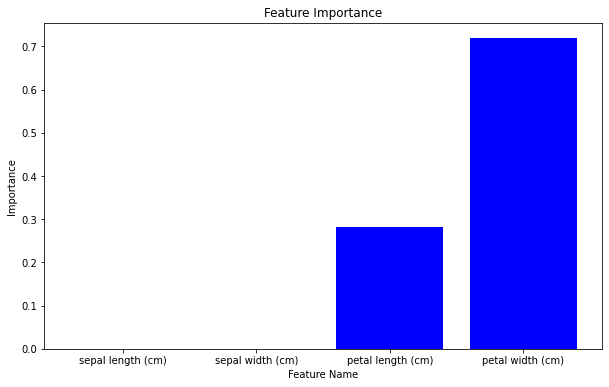

In [20]:
dt.plot_feature_importance(iris.feature_names)

In [18]:
train_preds = dt.predict(X_set=X_train)
print('""""""""""""""""""\nTrain Performance\n""""""""""""""""""')
print("Train Size:", len(Y_train))
print("True Predictions:", sum(train_preds == Y_train))
print("Train Accuracy:", sum(train_preds == Y_train)/len(Y_train) )

""""""""""""""""""
Train Performance
""""""""""""""""""
Train Size: 112
True Predictions: 106
Train Accuracy: 0.9464285714285714


In [19]:
test_preds = dt.predict(X_set=X_test)
print('""""""""""""""""""\nTest Performance\n""""""""""""""""""')
print("Test Size:", len(Y_test))
print("True Predictions:", sum(test_preds == Y_test))
print("Train Accuracy:", sum(test_preds == Y_test)/len(Y_test) )

""""""""""""""""""
Test Performance
""""""""""""""""""
Test Size: 38
True Predictions: 34
Train Accuracy: 0.8947368421052632
